# Data acquisition

In [331]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

data1_2008 = pd.read_csv('../others/data_50_60_2008_2016/data/data_gif/t_minus_1/gif_data_2008_full_5.0.csv')
data1_2016 = pd.read_csv('../others/data_50_60_2008_2016/data/data_gif/t_minus_1/gif_data_2016_full_5.0.csv')
data2_2008 = pd.read_csv('../others/data_50_60_2008_2016/data/data_gif/t_minus_2/gif_data_2008_full_5.0.csv')
data2_2016 = pd.read_csv('../others/data_50_60_2008_2016/data/data_gif/t_minus_2/gif_data_2016_full_5.0.csv')
data3_2008 = pd.read_csv('../others/data_50_60_2008_2016/data/data_gif/t_minus_3/gif_data_2008_full_5.0.csv')
data3_2016 = pd.read_csv('../others/data_50_60_2008_2016/data/data_gif/t_minus_3/gif_data_2016_full_5.0.csv')

# Formatting

In [136]:
data = pd.DataFrame({'t-1': data1_2008['gif'], 't-2': data2_2008['gif'], 't-3': data3_2008['gif']})
data = data.append(pd.DataFrame({'t-1': data1_2016['gif'], 't-2': data2_2016['gif'], 't-3': data3_2016['gif']}),ignore_index=True)
data = data.drop([0])
data['t'] = data1_2008['gif'].append(data1_2016['gif'],ignore_index=True)
data['time'] = data1_2008['time'].append(data1_2016['time'],ignore_index=True)
data = data.dropna()
display(data.describe())
display(data.head())

,t-1,t-2,t-3,t,time
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,-0.944870,-0.944570,-0.948098,-0.944870,1481.095003
std,1.896191,1.897023,1.895417,1.896191,913.088834
min,-2.564368,-2.553408,-2.581601,-2.564368,0.000000
25%,-1.981831,-1.982454,-1.982753,-1.981831,573.253768
50%,-1.739299,-1.738629,-1.735457,-1.739299,1448.915498
75%,-1.041717,-1.052271,-1.058421,-1.041717,2316.294412
max,6.929638,6.928643,6.929138,6.929638,3242.990313


,t-1,t-2,t-3,t,time
1,-2.564368,-2.553408,-2.581601,-2.564368,3.247533
2,-2.564368,-2.448544,-2.581601,-2.564368,6.495065
3,-2.564368,-2.502314,-2.581601,-2.564368,9.742598
4,-2.564368,-2.507581,-2.453890,-2.564368,10.101887
5,-2.074745,-2.379856,-2.515747,-2.074745,10.609433


# Train and test set
#### Using sklearn

In [349]:
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data[['t-1','t-2','t-3']].values,
                                                    data[['t']].values, test_size=0.33, random_state=42)
X_train = tf.constant(X_train, np.float32)
y_train = tf.constant(y_train, np.float32)
X_test = tf.constant(X_test, np.float32)
y_test = tf.constant(y_test, np.float32)

#### Separate in features and target
(no se usa)

In [138]:
features = tf.constant(data[['t-1','t-2','t-3']].values, np.float32)
target = tf.constant(data[['t']].values, np.float32)

# DFANN

In [179]:
neuron_number = 12 # 12 neurons in each Dense layer
i_data_dim = 3 # 3 GIFs as input

model_DFANN = Sequential()
model_DFANN.add(Dense(neuron_number, activation='relu', input_dim=i_data_dim))
model_DFANN.add(Dense(neuron_number, activation='relu'))
model_DFANN.add(Dense(neuron_number, activation='relu'))
model_DFANN.add(Dense(neuron_number, activation='relu'))
model_DFANN.add(Dense(1, activation='linear'))

model_DFANN.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae', 'mse'])

print(model_DFANN.summary())
plot_model(model_DFANN, to_file='model_DFANN.png', show_shapes=True)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 12)                48        
_________________________________________________________________
dense_46 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_47 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_48 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 13        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________
None
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


# fit y predict

In [180]:
np.random.seed(1337)

history_train = model_DFANN.fit(X_train, y_train, epochs=100, verbose=0)
y_predict = model_DFANN.predict(X_test)
y_trainpredict = model_DFANN.predict(X_train)

# Graphics

<IPython.core.display.Javascript object>


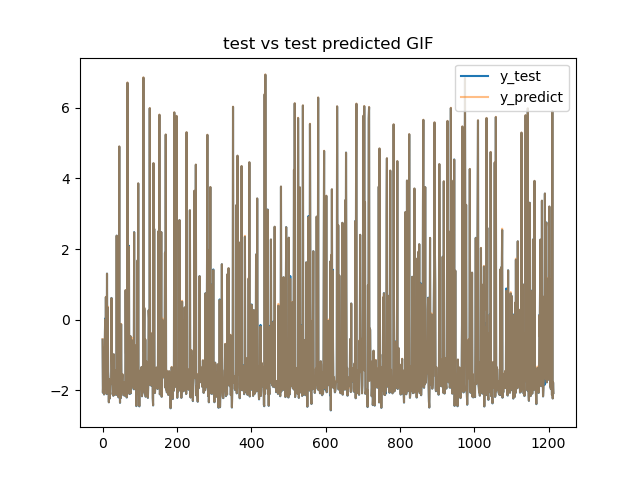

<IPython.core.display.Javascript object>


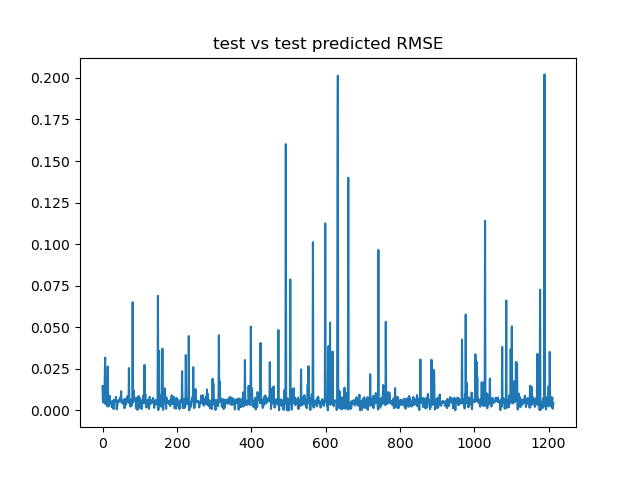

<IPython.core.display.Javascript object>


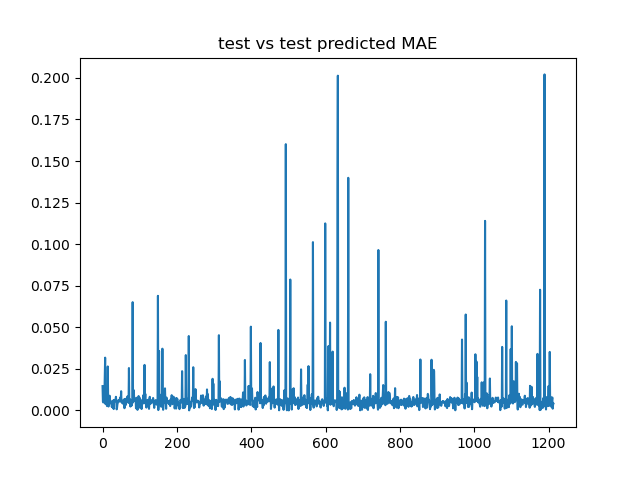

<IPython.core.display.Javascript object>


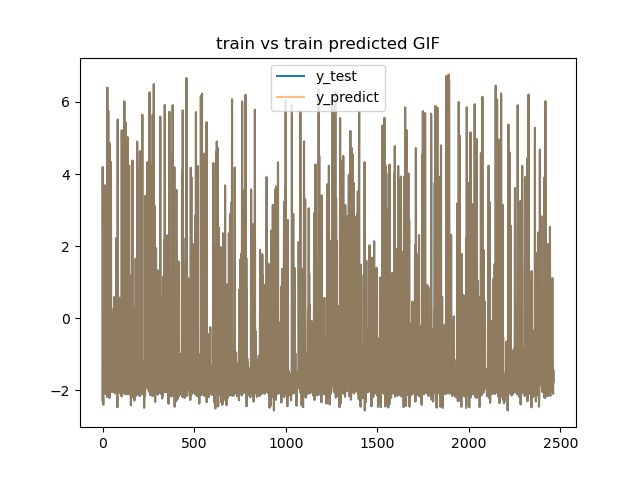

<IPython.core.display.Javascript object>


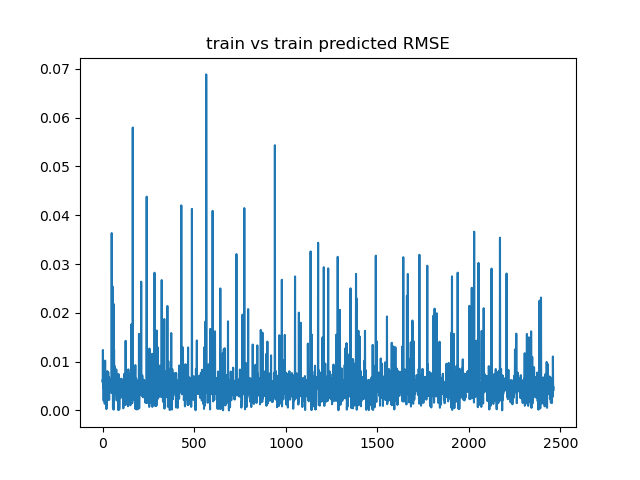

<IPython.core.display.Javascript object>


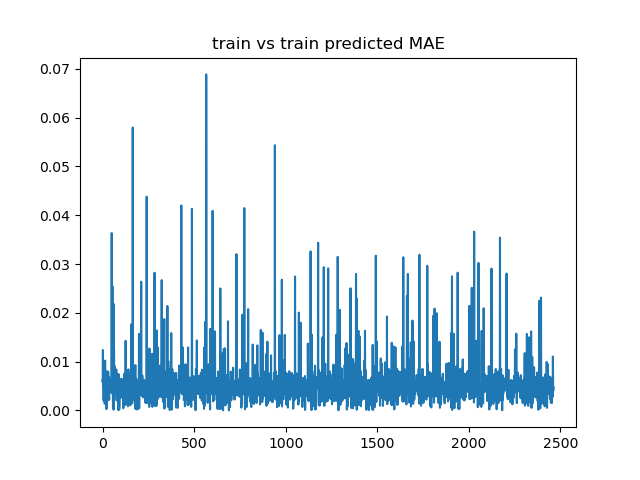

In [181]:
def do_the_graphics(target, predict, title):
    plt.figure()
    plt.title(title+' GIF')
    plt.plot(range(len(target)), target, alpha=1, label='y_test')
    plt.plot(range(len(target)), predict, alpha=0.5, label='y_predict')
    plt.legend()
    plt.show()

    plt.figure()
    plt.title(title+' RMSE')
    plt.plot(range(len(target)), np.sqrt(tf.keras.losses.mse(target, predict)))
    plt.show()

    plt.figure()
    plt.title(title+' MAE')
    plt.plot(range(len(target)), tf.keras.losses.mae(target, predict))
    plt.show()
    
do_the_graphs(y_test, y_predict, 'test vs test predicted')
do_the_graphs(y_train, y_trainpredict, 'train vs train predicted')

In [41]:
history = model_DFANN.fit(features, target, epochs=100, validation_split = 0.33,verbose=0)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,0.000134,0.008554,0.000134,0.000197,0.007460,0.000197,95
96,0.000047,0.004267,0.000047,0.000149,0.005398,0.000149,96
97,0.000207,0.010396,0.000207,0.000575,0.022342,0.000575,97
98,0.000148,0.008607,0.000148,0.000147,0.004125,0.000147,98
99,0.000032,0.003665,0.000032,0.000142,0.004826,0.000142,99


In [33]:
hist['mse'] = np.sqrt(hist['mse'].values)
hist

,loss,accuracy,mae,mse,val_loss,val_accuracy,val_mae,val_mse,epoch
0,0.000979,0.0,0.025422,0.031288,0.001038,0.0,0.028974,0.001038,0
1,0.000328,0.0,0.009790,0.018106,0.000432,0.0,0.016575,0.000432,1
2,0.000298,0.0,0.011253,0.017252,0.000447,0.0,0.012498,0.000447,2
3,0.000247,0.0,0.009097,0.015702,0.000230,0.0,0.007042,0.000230,3
4,0.000164,0.0,0.006790,0.012817,0.001275,0.0,0.013400,0.001275,4
...,...,...,...,...,...,...,...,...,...
95,0.000047,0.0,0.004810,0.006832,0.000828,0.0,0.010741,0.000828,95
96,0.000094,0.0,0.005580,0.009707,0.000606,0.0,0.008133,0.000606,96
97,0.000039,0.0,0.003582,0.006230,0.000430,0.0,0.006550,0.000430,97
98,0.000064,0.0,0.005460,0.008027,0.000587,0.0,0.007769,0.000587,98


In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


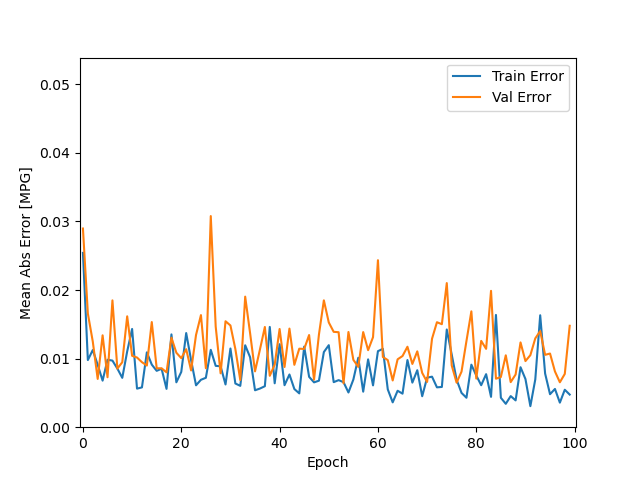

<IPython.core.display.Javascript object>


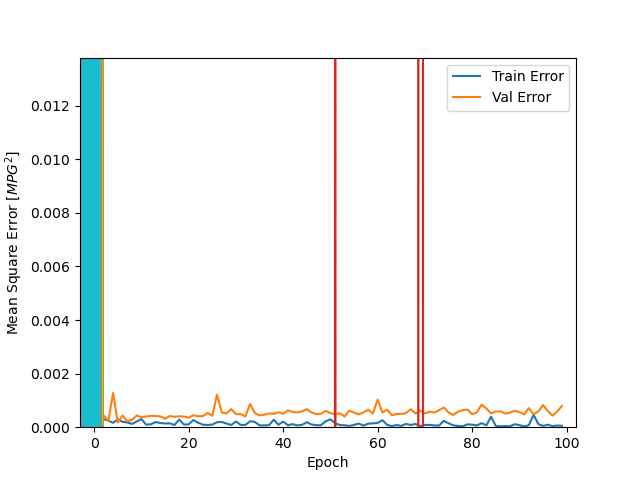

In [21]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


In [ ]:
results = model.fit(X_train, y_train, epochs=100,
                    validation_split = 0.3, verbose=0, callbacks=[early_stop, PrintDot()])





# LSTM

In [346]:
cell_number = 12 # 12 cells in LSTM layer
batch_size = 1 
timesteps = 3 # 3 GIFs for each time series
data_dim = 1 # 1 GIF as data

model_LSTM = Sequential()
model_LSTM.add(LSTM(cell_number, activation='relu', batch_input_shape=(batch_size,timesteps,data_dim), stateful=True))
model_LSTM.add(Dense(1, activation='linear'))

model_LSTM.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

print(model_LSTM.summary())
plot_model(model_LSTM, to_file='model_LSTM.png', show_shapes=True)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (1, 12)                   672       
_________________________________________________________________
dense_59 (Dense)             (1, 1)                    13        
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
None
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


# fit & predict

In [350]:
history_train = model_LSTM.fit(X_train, y_train, epochs=100, verbose=0, batch_size = 1)
y_predict = model_LSTM.predict(X_test_reshaped)
y_trainpredict = model_LSTM.predict(X_train_reshaped)

ValueError: Error when checking input: expected lstm_20_input to have 3 dimensions, but got array with shape (2463, 3)

In [335]:
X_train_reshaped = tf.tile(tf.expand_dims(X_train,2),[1,1,len(X_train)])
X_test_reshaped = tf.tile(tf.expand_dims(X_test,2),[1,1,len(X_test)])

history_train = model_LSTM.fit(X_train, y_train, epochs=100, verbose=0)
y_predict = model_LSTM.predict(X_test_reshaped)
y_trainpredict = model_LSTM.predict(X_train_reshaped)

ValueError: Error when checking input: expected lstm_19_input to have 3 dimensions, but got array with shape (2463, 3)

In [312]:
len(X_test)

1214

In [323]:
tf.concat([tf.reshape(sample,[1,3,1]),(tf.reshape(sample,[1,3,1]))],2)

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[-1.7751786, -1.7751786],
        [-1.7846189, -1.7846189],
        [-1.7681711, -1.7681711]]], dtype=float32)>